In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import matplotlib.colors as mcolors
from scipy.ndimage import gaussian_filter1d

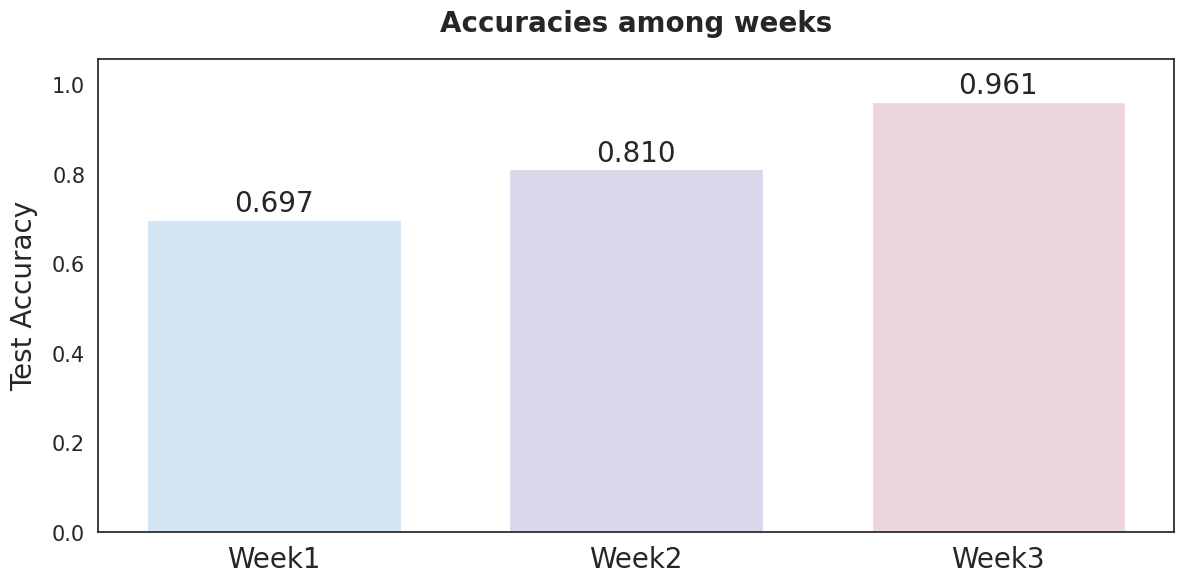

In [3]:
names = ["Week1", "Week2", "Week3"]
test_accuracies = [0.697, 0.810, 0.961]
sns.set_theme(style="white", palette="viridis")

cmap = plt.get_cmap('mako')
colors = cmap(np.linspace(0.4, 0.8, len(test_accuracies)))
colors = ["#cfe2f3ff", "#d9d2e9ff", "#ead1dcff"]

plt.figure(figsize=(12,6))

bars = plt.bar(
    names,
    test_accuracies,
    color=colors,
    width=0.7,
    edgecolor='white',
    linewidth=1,
    alpha=0.9
)

plt.bar_label(bars, fmt='%.3f', padding=2, fontsize=20)

plt.title("Accuracies among weeks", fontsize=20, pad=20, fontweight='bold')
plt.ylabel("Test Accuracy", fontsize=20, labelpad=10)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.margins(y=0.1)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=15)


plt.tight_layout()
plt.show()

In [4]:
df = pd.read_csv("accuracies/augmentation.csv")
df.head()

,epoch,Test all epochs - train_acc,Test all epochs - train_acc__MIN,Test all epochs - train_acc__MAX,Test all epochs - _step,Test all epochs - _step__MIN,Test all epochs - _step__MAX,Test all epochs - test_acc,Test all epochs - test_acc__MIN,Test all epochs - test_acc__MAX,All epochs with augmentation - train_acc,All epochs with augmentation - train_acc__MIN,All epochs with augmentation - train_acc__MAX,All epochs with augmentation - _step,All epochs with augmentation - _step__MIN,All epochs with augmentation - _step__MAX,All epochs with augmentation - test_acc,All epochs with augmentation - test_acc__MIN,All epochs with augmentation - test_acc__MAX
0,0,0.125,0.125,0.125,0.5,0.0,1.0,0.112325,0.112325,0.112325,0.125,0.125,0.125,0.5,0,1,0.111451,0.111451,0.111451
1,1,0.125,0.125,0.125,2.5,2.0,3.0,0.112762,0.112762,0.112762,0.125,0.125,0.125,2.5,2,3,0.112762,0.112762,0.112762
2,2,0.125,0.125,0.125,4.5,4.0,5.0,0.101836,0.101836,0.101836,0.125,0.125,0.125,4.5,4,5,0.103584,0.103584,0.103584
3,3,0.125,0.125,0.125,6.5,6.0,7.0,0.138986,0.138986,0.138986,0.125,0.125,0.125,6.5,6,7,0.138112,0.138112,0.138112
4,4,0.125,0.125,0.125,8.5,8.0,9.0,0.154720,0.154720,0.154720,0.125,0.125,0.125,8.5,8,9,0.155594,0.155594,0.155594


0.4938811063766479
0.5388985872268677


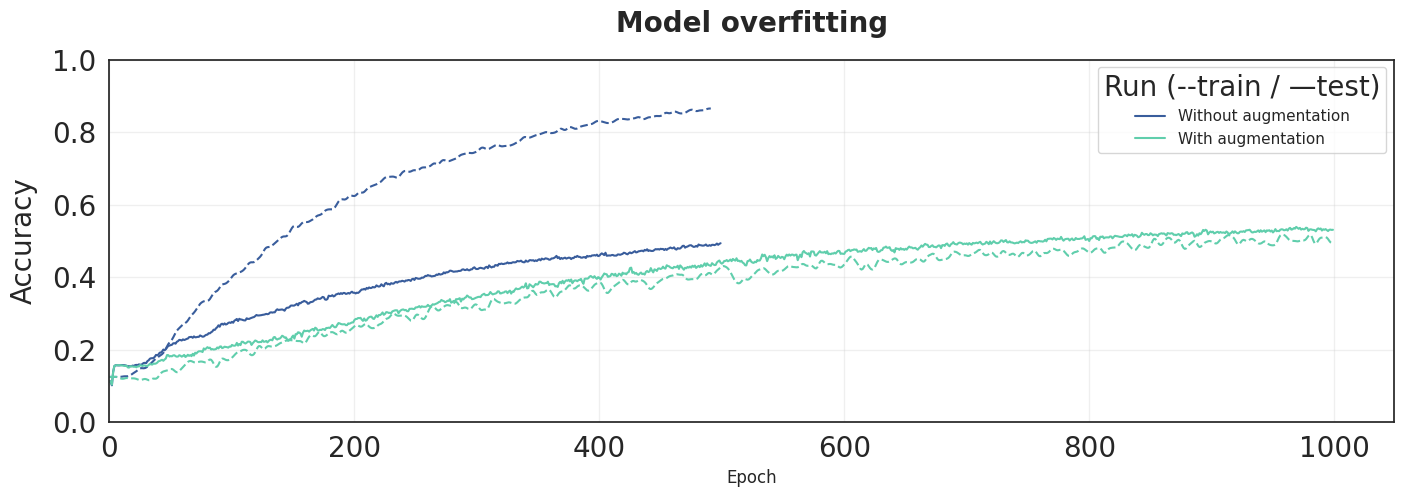

In [5]:
plt.figure(figsize=(14, 5))

cmap = plt.get_cmap('mako')
colors = cmap(np.linspace(0.4, 0.8, 2))

values = gaussian_filter1d(df["Test all epochs - train_acc"].values, sigma=2)
df["Test all epochs - train_acc"] = values

values = gaussian_filter1d(df["All epochs with augmentation - train_acc"].values, sigma=2)
df["All epochs with augmentation - train_acc"] = values

print(df["Test all epochs - test_acc"].max())
print(df["All epochs with augmentation - test_acc"].max())

plt.plot(df['epoch'], df["Test all epochs - test_acc"],  label=f"Without augmentation", color=colors[0])
plt.plot(df['epoch'], df["Test all epochs - train_acc"], linestyle="--", color=colors[0])
plt.plot(df['epoch'], df["All epochs with augmentation - test_acc"],  label=f"With augmentation", color=colors[1])
plt.plot(df['epoch'], df["All epochs with augmentation - train_acc"], linestyle="--", color=colors[1])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = plt.legend(by_label.values(), by_label.keys(), title="Run (--train / —test)", loc='upper right')
plt.setp(legend.get_title(), fontsize=20)
plt.title("Model overfitting", fontsize=20, pad=20, fontweight='bold')
plt.ylabel("Accuracy", fontsize=20, labelpad=10)
plt.xlabel("Epoch")
plt.xlim(left=0)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [6]:
df = pd.read_csv("accuracies/lr_test.csv")
df.head()

,epoch,All epochs with augmentation - test_acc,All epochs with augmentation - test_acc__MIN,All epochs with augmentation - test_acc__MAX,All epochs with augmentation - _step,All epochs with augmentation - _step__MIN,All epochs with augmentation - _step__MAX,Small LeNet WDA - test_acc,Small LeNet WDA - test_acc__MIN,Small LeNet WDA - test_acc__MAX,Small LeNet WDA - _step,Small LeNet WDA - _step__MIN,Small LeNet WDA - _step__MAX
0,0,0.111451,0.111451,0.111451,0,0,0,0.090909,0.090909,0.090909,0,0,0
1,1,0.112762,0.112762,0.112762,2,2,2,0.091783,0.091783,0.091783,2,2,2
2,2,0.103584,0.103584,0.103584,4,4,4,0.096154,0.096154,0.096154,4,4,4
3,3,0.138112,0.138112,0.138112,6,6,6,0.194056,0.194056,0.194056,6,6,6
4,4,0.155594,0.155594,0.155594,8,8,8,0.323427,0.323427,0.323427,8,8,8


0.80923580479441


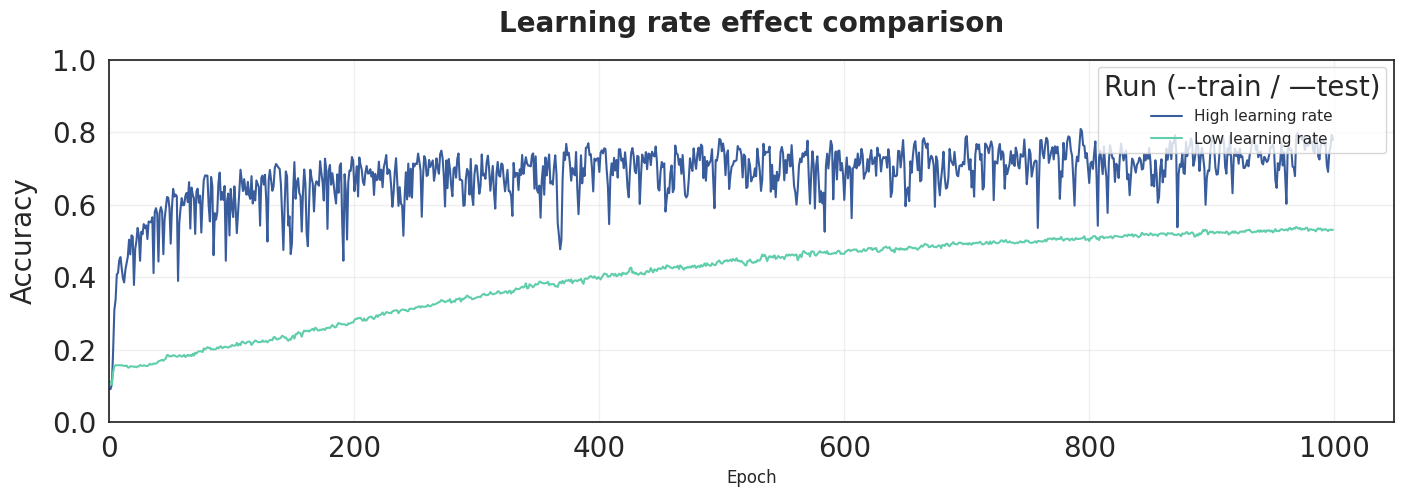

In [7]:
plt.figure(figsize=(14, 5))

cmap = plt.get_cmap('mako')
colors = cmap(np.linspace(0.4, 0.8, 2))

# values = gaussian_filter1d(df["All epochs with augmentation - test_acc"].values, sigma=2)
# df["All epochs with augmentation - test_acc"] = values

values = gaussian_filter1d(df["Small LeNet WDA - test_acc"].values, sigma=0.5)
df["Small LeNet WDA - test_acc"] = values

print(df["Small LeNet WDA - test_acc"].max())

plt.plot(df['epoch'], df["Small LeNet WDA - test_acc"],  label=f"High learning rate", color=colors[0])
plt.plot(df['epoch'], df["All epochs with augmentation - test_acc"],  label=f"Low learning rate", color=colors[1])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = plt.legend(by_label.values(), by_label.keys(), title="Run (--train / —test)", loc='upper right')
plt.setp(legend.get_title(), fontsize=20)
plt.title("Learning rate effect comparison", fontsize=20, pad=20, fontweight='bold')
plt.ylabel("Accuracy", fontsize=20, labelpad=10)
plt.xlabel("Epoch")
plt.xlim(left=0)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [8]:
df = pd.read_csv("accuracies/res_test.csv")
df.head()

,epoch,Not so small resnet WDA depthwise - test_acc,Not so small resnet WDA depthwise - test_acc__MIN,Not so small resnet WDA depthwise - test_acc__MAX,Not so small resnet WDA depthwise - _step,Not so small resnet WDA depthwise - _step__MIN,Not so small resnet WDA depthwise - _step__MAX,Not so small resnet WDA - test_acc,Not so small resnet WDA - test_acc__MIN,Not so small resnet WDA - test_acc__MAX,Not so small resnet WDA - _step,Not so small resnet WDA - _step__MIN,Not so small resnet WDA - _step__MAX
0,0,0.091783,0.091783,0.091783,0,0,0,0.145979,0.145979,0.145979,0,0,0
1,1,0.135490,0.135490,0.135490,2,2,2,0.187500,0.187500,0.187500,2,2,2
2,2,0.157343,0.157343,0.157343,4,4,4,0.177010,0.177010,0.177010,4,4,4
3,3,0.135490,0.135490,0.135490,6,6,6,0.225524,0.225524,0.225524,6,6,6
4,4,0.091783,0.091783,0.091783,8,8,8,0.279720,0.279720,0.279720,8,8,8


<Figure size 1400x500 with 0 Axes>

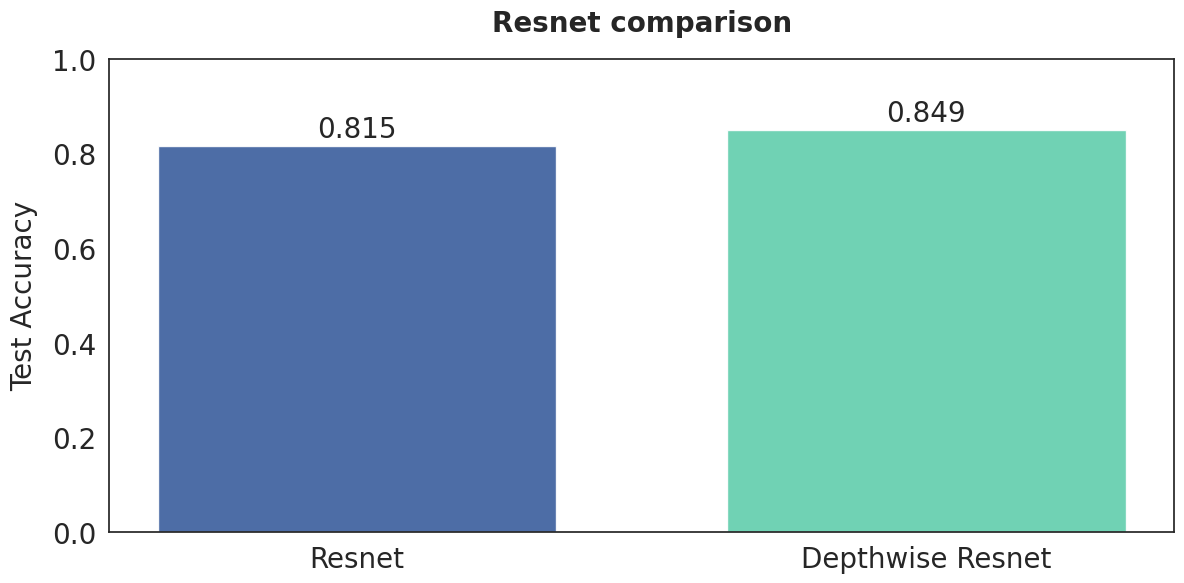

In [9]:
plt.figure(figsize=(14, 5))

names = ["Resnet", "Depthwise Resnet"]
test_accuracies = [df["Not so small resnet WDA - test_acc"].max(), df["Not so small resnet WDA depthwise - test_acc"].max()]

sns.set_theme(style="white", palette="viridis")

cmap = plt.get_cmap('mako')
colors = cmap(np.linspace(0.4, 0.8, len(test_accuracies)))

plt.figure(figsize=(12,6))

bars = plt.bar(
    names,
    test_accuracies,
    color=colors,
    width=0.7,
    edgecolor='white',
    linewidth=1,
    alpha=0.9
)

plt.bar_label(bars, fmt='%.3f', padding=2, fontsize=20)

plt.title("Resnet comparison", fontsize=20, pad=20, fontweight='bold')
plt.ylabel("Test Accuracy", fontsize=20, labelpad=10)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.show()

In [15]:
df = pd.read_csv("accuracies/mobile_test.csv")
df.head()

plt.figure(figsize=(14, 5))

names = ["Resnet", "Depthwise Resnet"]
test_accuracies = [df["Small Mobile WDA - test_acc"].max(), df["Extended Mobile WDA - test_acc"].max()]

print(test_accuracies)

[np.float64(0.8990384340286255), np.float64(0.8977272510528564)]


<Figure size 1400x500 with 0 Axes>

In [16]:
df = pd.read_csv("accuracies/depth_lenet.csv")
plt.figure(figsize=(14, 5))

names = ["Resnet", "Depthwise Resnet"]
test_accuracies = [df["Depthwise lenet WDA - test_acc"].max()]

print(test_accuracies)


[np.float64(0.8129370808601379)]


<Figure size 1400x500 with 0 Axes>